In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import copy, math

In [2]:
try:
  pd.read_csv('linear_train.csv')
except:
  !wget "https://forwardmark.aashishsinhasin.repl.co/924306949/1162/linear_train.csv"

--2023-03-29 13:49:25--  https://forwardmark.aashishsinhasin.repl.co/924306949/1162/linear_train.csv
Resolving forwardmark.aashishsinhasin.repl.co (forwardmark.aashishsinhasin.repl.co)... 34.149.204.188
Connecting to forwardmark.aashishsinhasin.repl.co (forwardmark.aashishsinhasin.repl.co)|34.149.204.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20112119 (19M) [text/csv]
Saving to: ‘linear_train.csv’

linear_train.csv    100%[===================>]  19.18M  1.14MB/s    in 17s     

2023-03-29 13:49:45 (1.14 MB/s) - ‘linear_train.csv’ saved [20112119/20112119]



In [3]:
df = pd.read_csv('linear_train.csv')


x_train= df.loc[:,'A':'T'].to_numpy()
y_train= df.loc[:,'label'].to_numpy()


In [4]:

print(f"X Shape: {x_train.shape}, X Type:{type(x_train)})")
print(x_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)#

X Shape: (50000, 20), X Type:<class 'numpy.ndarray'>)
[[-2.84685568e+02  2.84567363e+02  1.84627063e+01 ... -1.20010842e+01
   8.39780551e+01  7.37317448e+02]
 [-4.28480005e+02  3.07240676e+02  2.26328973e+01 ...  1.80573704e+01
  -5.55216301e+01  7.75407458e+02]
 [-2.58008787e+01  2.37433758e+02 -4.67504670e-01 ...  7.06526251e+01
   3.02121708e+02  8.10402101e+02]
 ...
 [-2.54691431e+02  2.56793278e+02  2.31974534e+01 ... -2.30785214e+01
   1.88422643e+02  7.48559054e+02]
 [ 7.10054262e+02  2.57565009e+02 -1.63356012e+01 ...  1.52388356e+01
   8.95278167e+01  7.57012968e+02]
 [-2.69821407e+02  2.81097270e+02 -3.05824270e+01 ...  8.34763802e+00
   1.44270028e+02  7.32900535e+02]]
y Shape: (50000,), y Type:<class 'numpy.ndarray'>)
[-218.01623149  154.14084898  394.84970115 ...   -3.44448897  445.35678148
 -500.9246807 ]


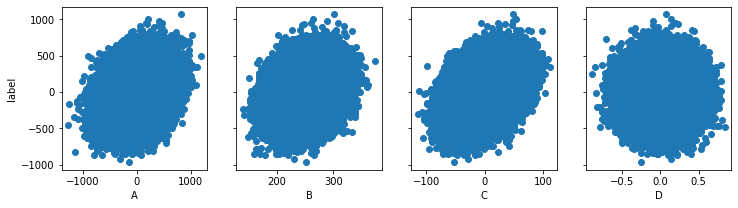

In [5]:
x_features=list('ABCDEFGHIJKLMNOPQRST')
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("label")
plt.show()

In [6]:

def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)



def train_lr(no_of_iterations, learning_rate, X, Y):
    ''' 
    no_of_iterations : number of times to run training 
    learning rate    : alpha 
    X                : training data 
    Y                : labels
    X_test           : test data 
    '''
 
    #W = -16
    datapoints, m_train=x_train.shape
    W = np.zeros(m_train)
    b = 0
    cost_history=[]
    # loop for iterations
    for t in range(no_of_iterations):
      Y_pred= W @ (X.T) +b
      #print(Y_pred.shape)
      #print(Y.shape)

      cost = np.sum((Y_pred-Y)**2)
      cost=cost/(2*datapoints)
      cost_history.append(cost)

      grad_w= ((Y_pred-Y) @ X)/datapoints
      grad_b= (np.sum(Y_pred - Y))/datapoints

      if t%100 == 0 : 
            plt.clf()
            print(f"After {t+1} iteration Loss: {cost}")
            plt.scatter(X[:,0:1],Y, marker = "+",c='b',label='Actual value')
            plt.scatter(X[:,0:1],Y_pred, marker = "+",c='r', label='Predicted Value')
            plt.xlabel('X →')
            plt.ylabel('Y →')
            plt.legend()
            plt.show()
            plt.clf()

      W  = W-learning_rate*grad_w
      b  = b-learning_rate*grad_b

    return W,b, cost_history








After 1 iteration Loss: 30357.23198081161


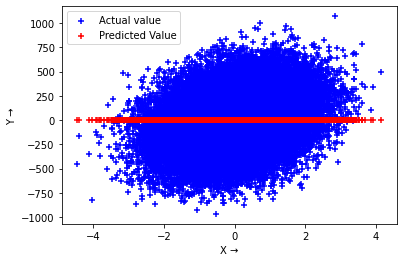

After 101 iteration Loss: 25242.418802459764


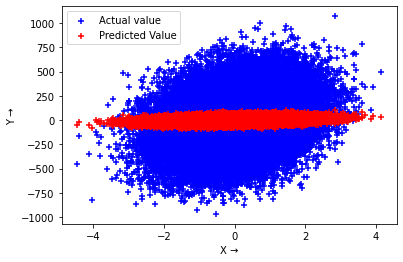

After 201 iteration Loss: 21213.10536166641


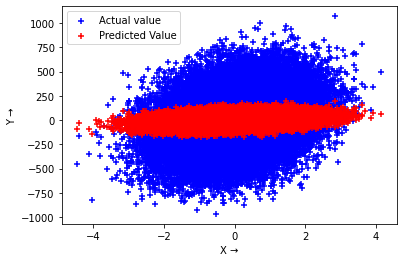

After 301 iteration Loss: 18020.10602127359


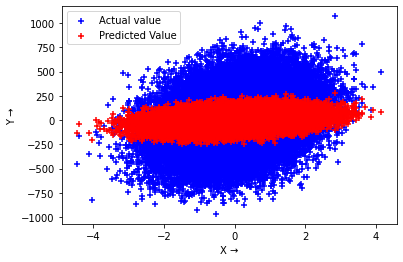

After 401 iteration Loss: 15476.727958437259


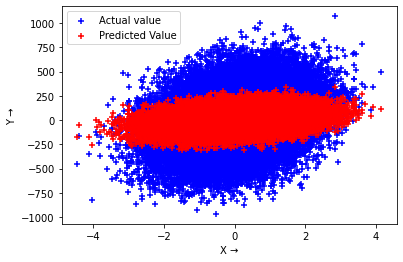

After 501 iteration Loss: 13441.722699954298


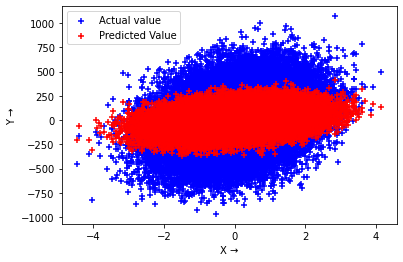

After 601 iteration Loss: 11807.216349845537


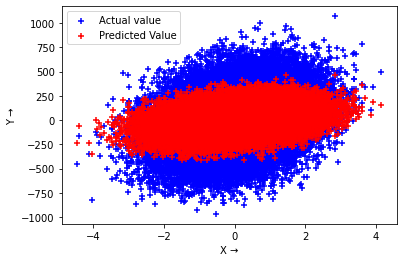

After 701 iteration Loss: 10490.092779091327


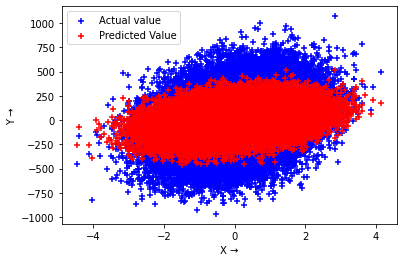

After 801 iteration Loss: 9425.786306209475


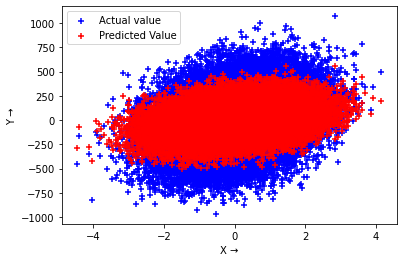

After 901 iteration Loss: 8563.767354461292


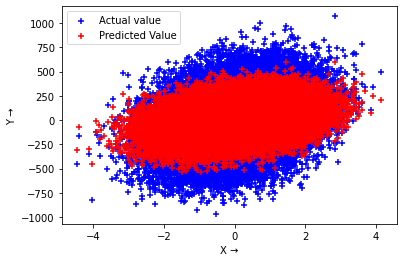

After 1001 iteration Loss: 7864.226781239761


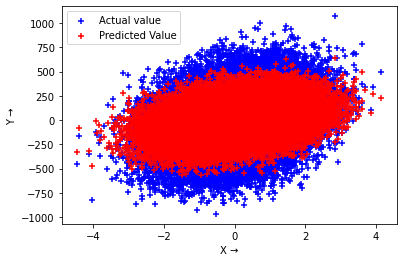

After 1101 iteration Loss: 7295.616034558808


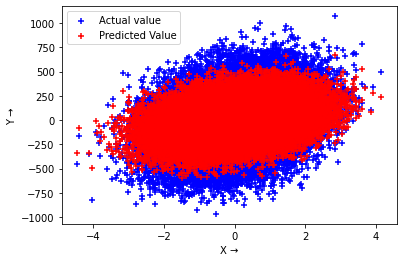

After 1201 iteration Loss: 6832.8038813850435


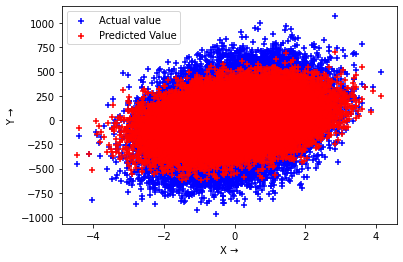

After 1301 iteration Loss: 6455.68158739856


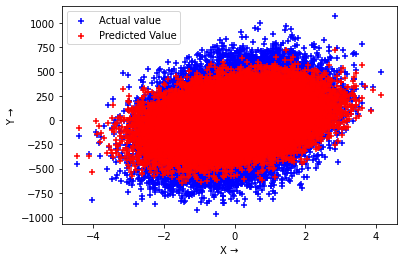

After 1401 iteration Loss: 6148.097504560324


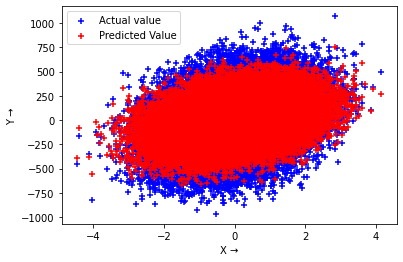

After 1501 iteration Loss: 5897.036064220252


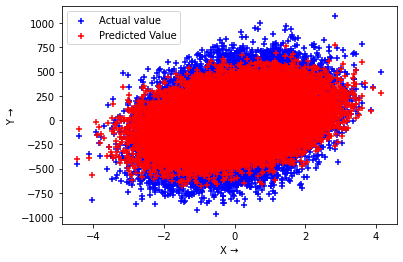

After 1601 iteration Loss: 5691.979931014074


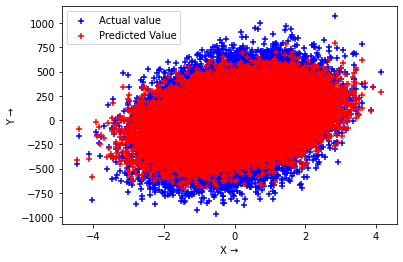

After 1701 iteration Loss: 5524.410768078742


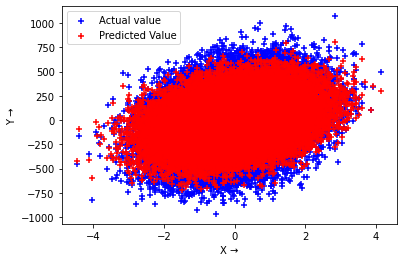

After 1801 iteration Loss: 5387.415886803913


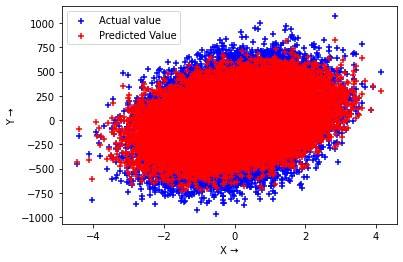

After 1901 iteration Loss: 5275.376497009574


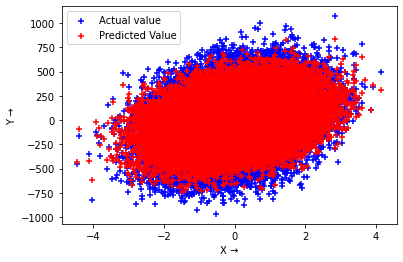

After 2001 iteration Loss: 5183.719357026416


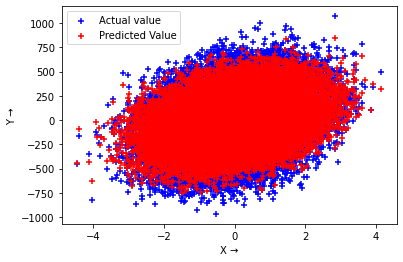

After 2101 iteration Loss: 5108.7180487941505


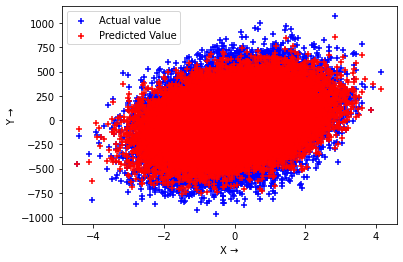

After 2201 iteration Loss: 5047.333354562266


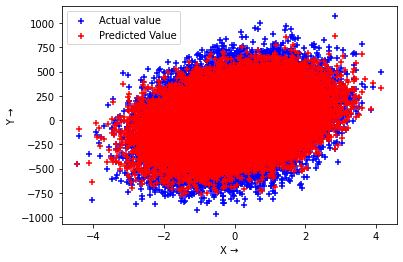

After 2301 iteration Loss: 4997.084624686677


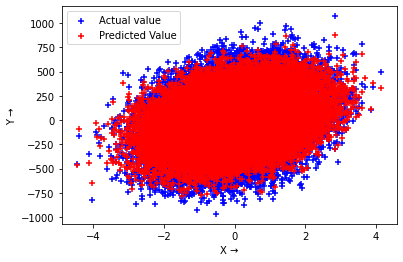

After 2401 iteration Loss: 4955.945834619621


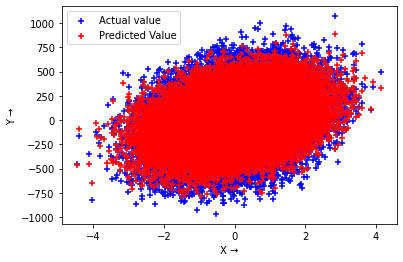

After 2501 iteration Loss: 4922.261398135496


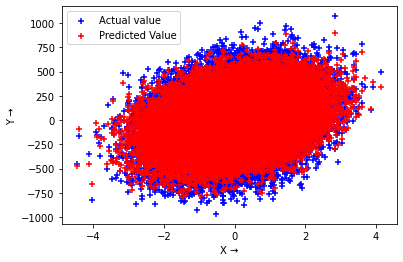

After 2601 iteration Loss: 4894.677849735671


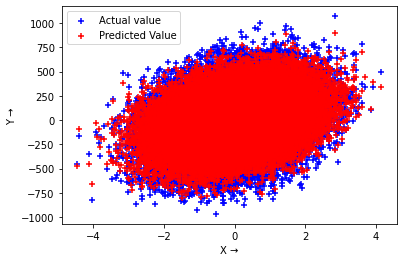

After 2701 iteration Loss: 4872.088315320874


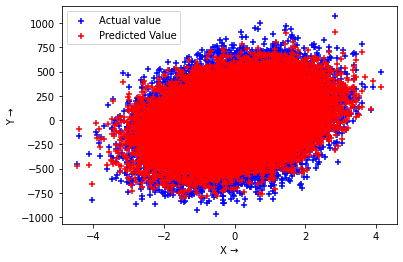

After 2801 iteration Loss: 4853.587316639181


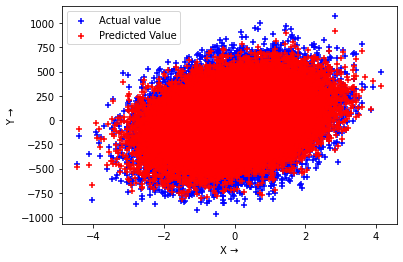

After 2901 iteration Loss: 4838.433945388741


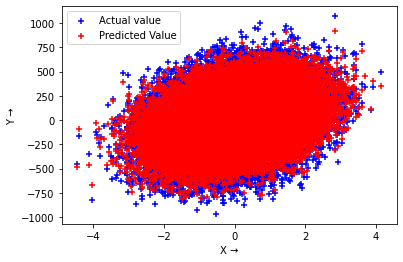

After 3001 iteration Loss: 4826.021829273371


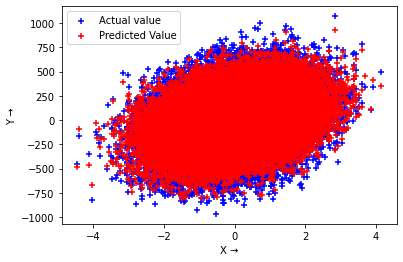

After 3101 iteration Loss: 4815.85461859933


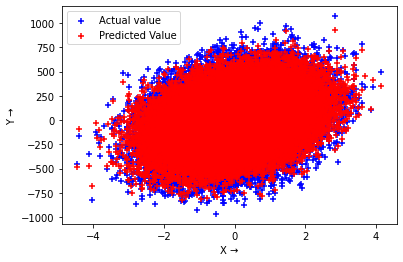

After 3201 iteration Loss: 4807.525966023141


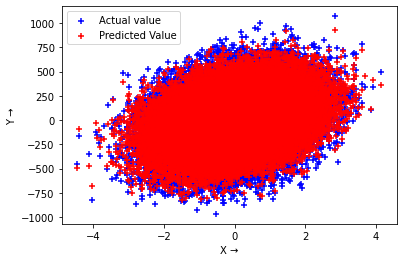

After 3301 iteration Loss: 4800.703167334219


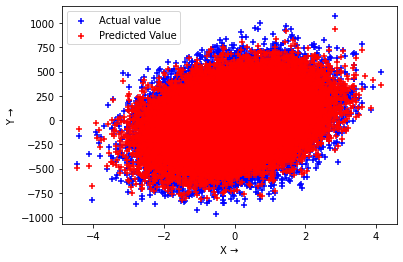

After 3401 iteration Loss: 4795.113788014526


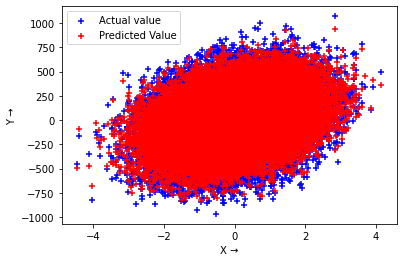

After 3501 iteration Loss: 4790.534726724987


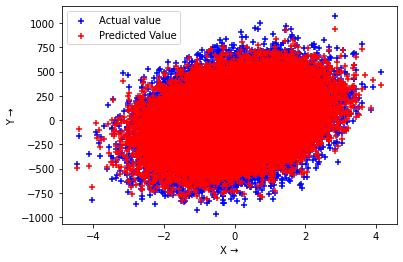

After 3601 iteration Loss: 4786.783269015187


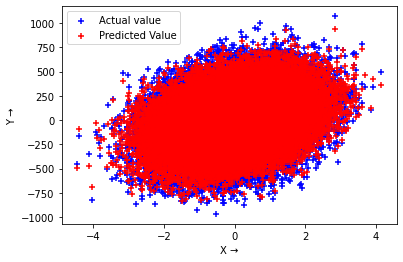

After 3701 iteration Loss: 4783.709767284733


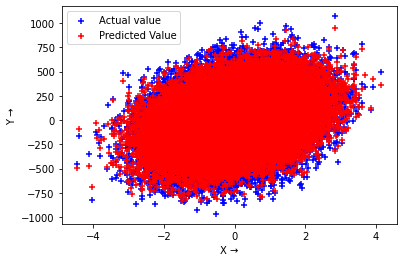

After 3801 iteration Loss: 4781.191650161046


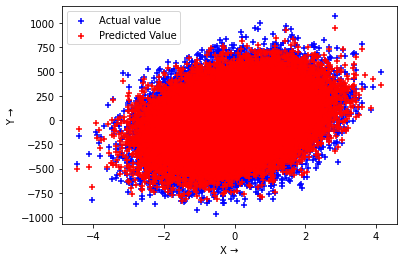

After 3901 iteration Loss: 4779.128519026387


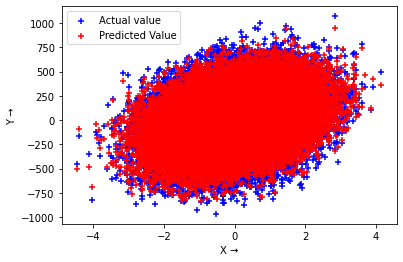

After 4001 iteration Loss: 4777.438133839039


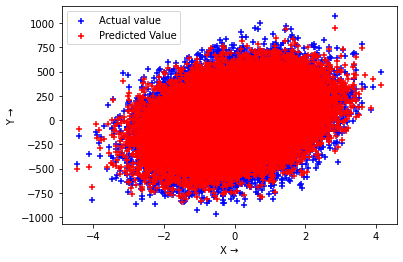

After 4101 iteration Loss: 4776.053126579831


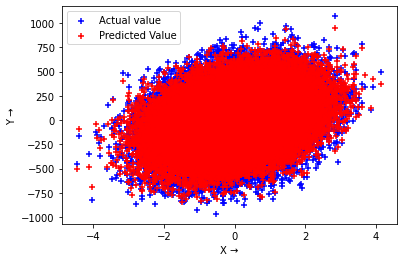

After 4201 iteration Loss: 4774.918310166353


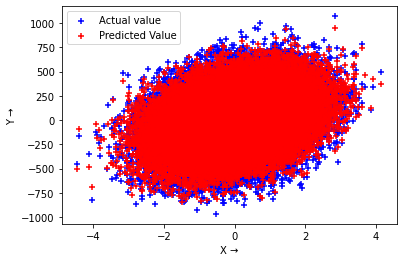

After 4301 iteration Loss: 4773.988474763032


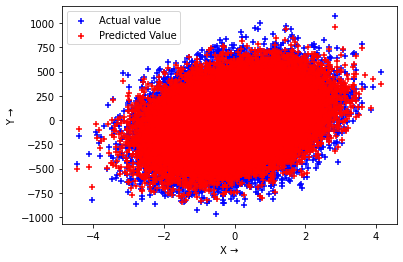

After 4401 iteration Loss: 4773.2265830851975


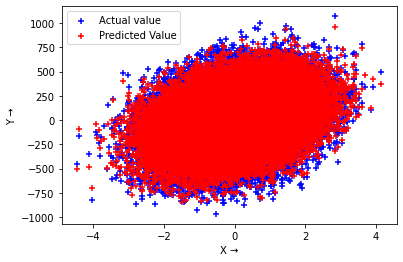

After 4501 iteration Loss: 4772.60229236765


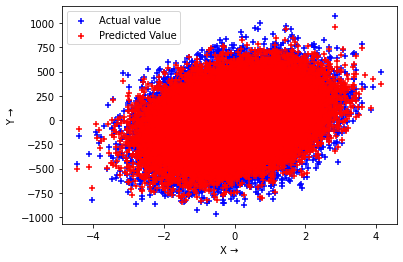

After 4601 iteration Loss: 4772.090743806435


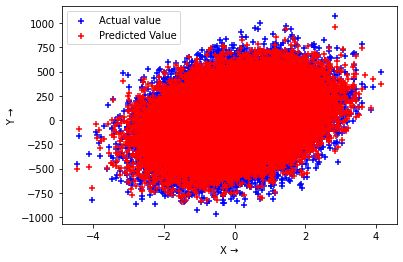

After 4701 iteration Loss: 4771.671571026105


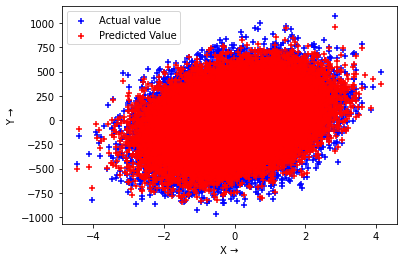

After 4801 iteration Loss: 4771.3280879128015


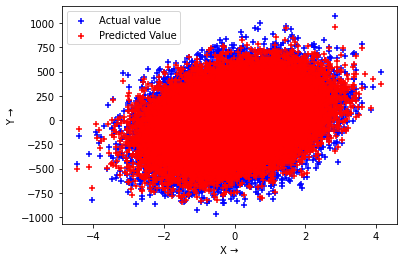

After 4901 iteration Loss: 4771.046623343548


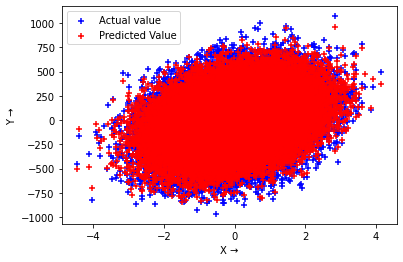

After 5001 iteration Loss: 4770.815976226207


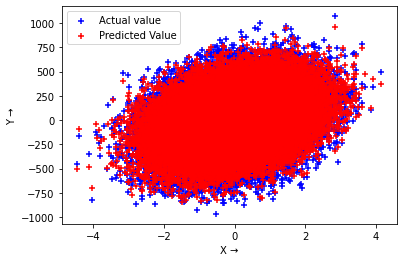

After 5101 iteration Loss: 4770.6269690803665


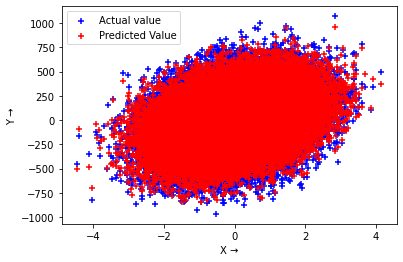

After 5201 iteration Loss: 4770.472082331781


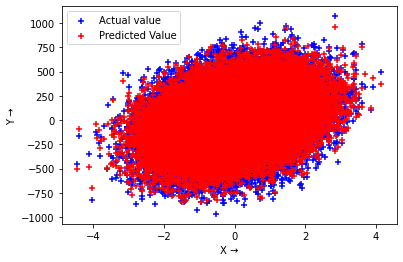

After 5301 iteration Loss: 4770.345154720372


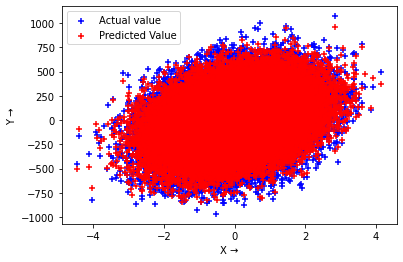

After 5401 iteration Loss: 4770.2411378644665


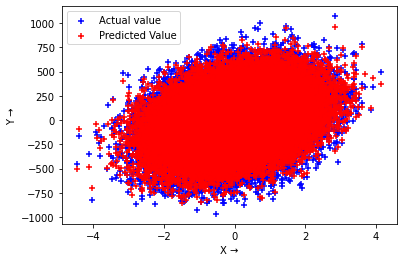

After 5501 iteration Loss: 4770.155895187699


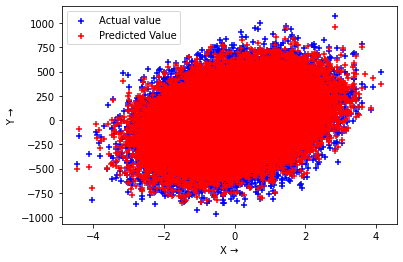

After 5601 iteration Loss: 4770.086037186988


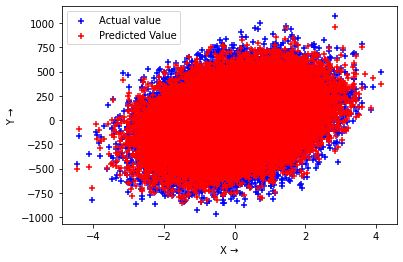

After 5701 iteration Loss: 4770.028786471139


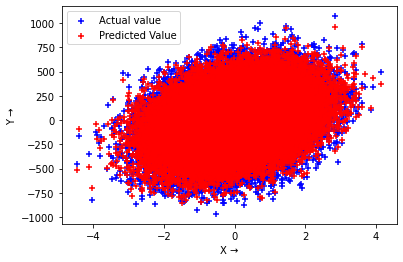

After 5801 iteration Loss: 4769.981867188027


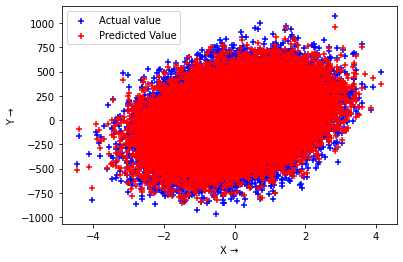

After 5901 iteration Loss: 4769.943414431701


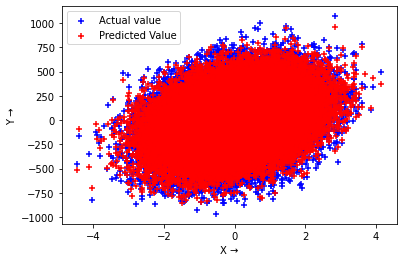

After 6001 iteration Loss: 4769.911900018042


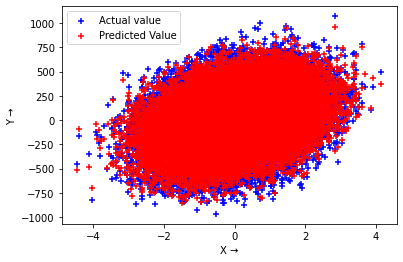

After 6101 iteration Loss: 4769.886071670486


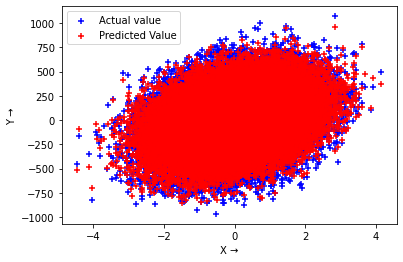

After 6201 iteration Loss: 4769.864903192364


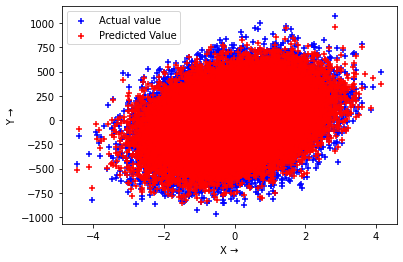

After 6301 iteration Loss: 4769.847553640398


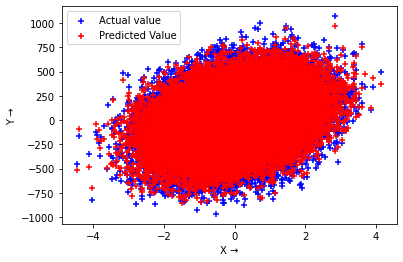

After 6401 iteration Loss: 4769.8333338728735


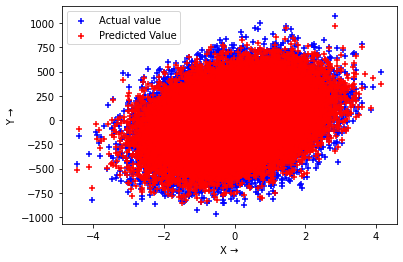

After 6501 iteration Loss: 4769.821679140002


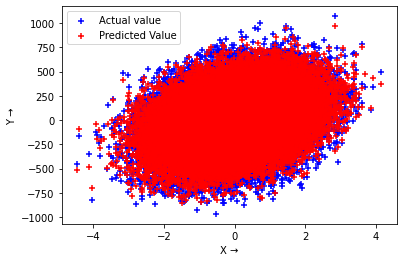

After 6601 iteration Loss: 4769.812126624772


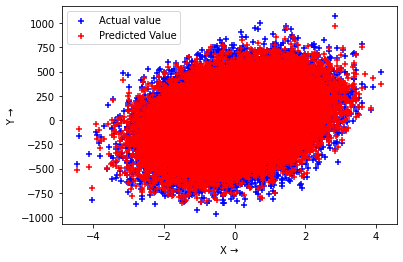

After 6701 iteration Loss: 4769.804297039959


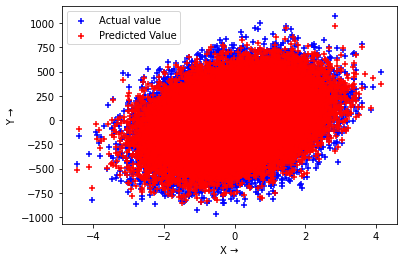

After 6801 iteration Loss: 4769.797879548503


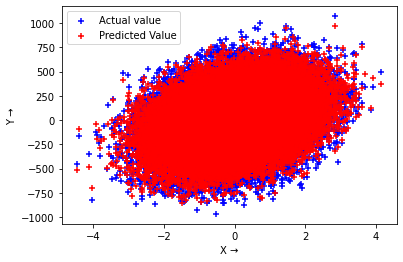

After 6901 iteration Loss: 4769.7926194069705


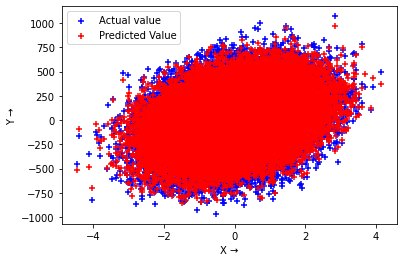

After 7001 iteration Loss: 4769.788307840183


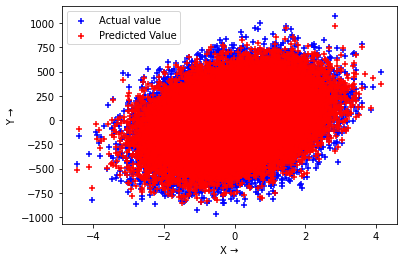

After 7101 iteration Loss: 4769.784773744068


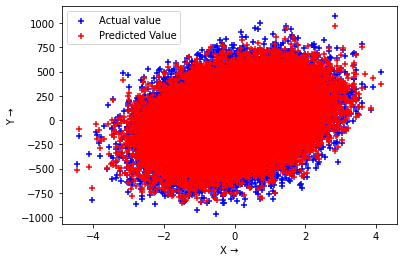

After 7201 iteration Loss: 4769.781876886523


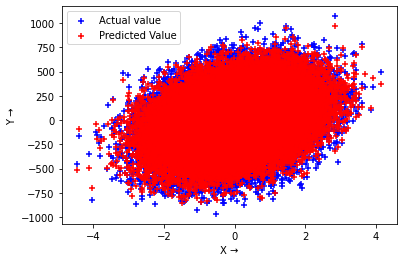

After 7301 iteration Loss: 4769.77950233576


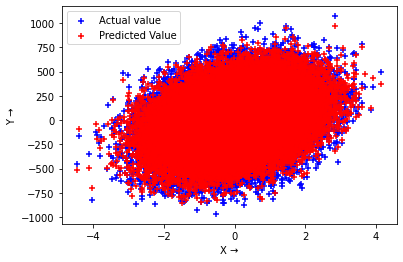

After 7401 iteration Loss: 4769.777555894475


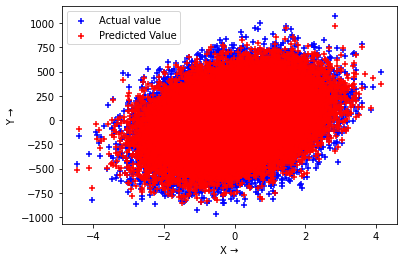

After 7501 iteration Loss: 4769.775960358208


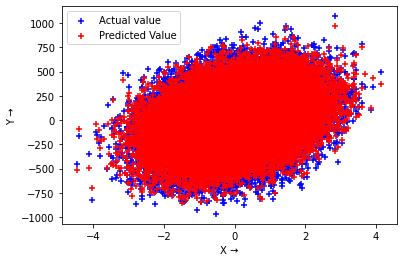

After 7601 iteration Loss: 4769.774652449085


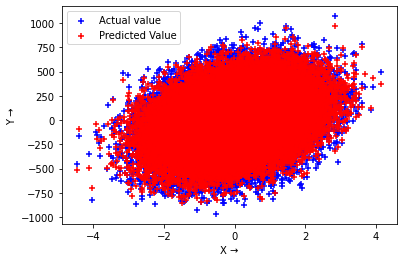

After 7701 iteration Loss: 4769.773580302989


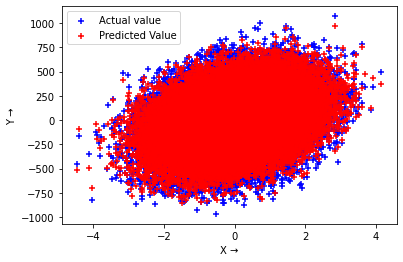

After 7801 iteration Loss: 4769.772701410262


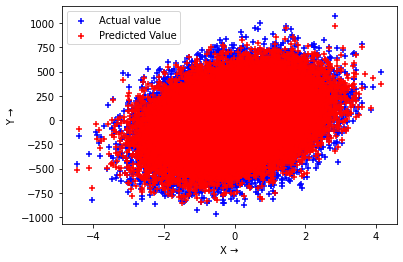

After 7901 iteration Loss: 4769.771980928041


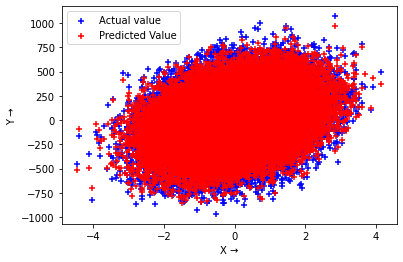

After 8001 iteration Loss: 4769.771390297151


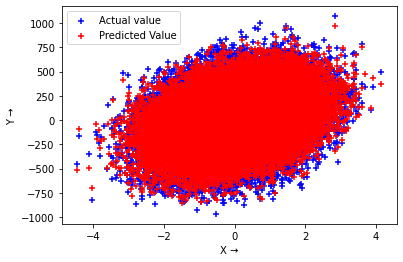

After 8101 iteration Loss: 4769.770906108587


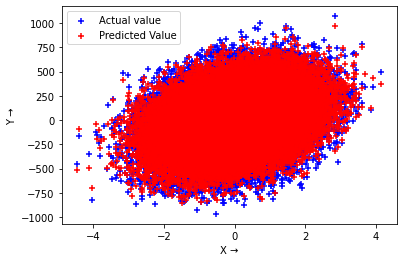

After 8201 iteration Loss: 4769.770509174522


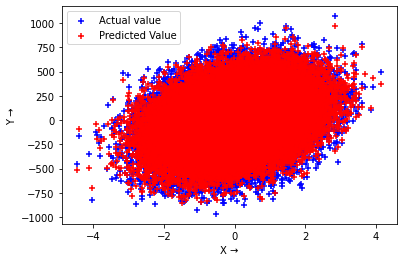

After 8301 iteration Loss: 4769.770183766927


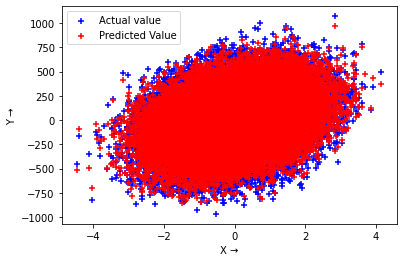

After 8401 iteration Loss: 4769.769916993565


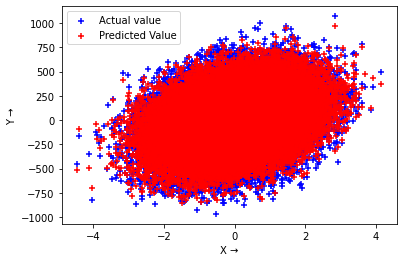

After 8501 iteration Loss: 4769.769698286562


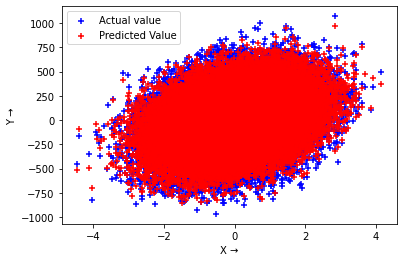

After 8601 iteration Loss: 4769.769518983226


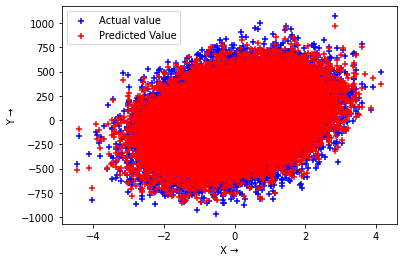

After 8701 iteration Loss: 4769.769371982499


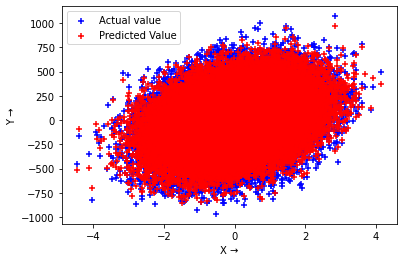

After 8801 iteration Loss: 4769.769251463357


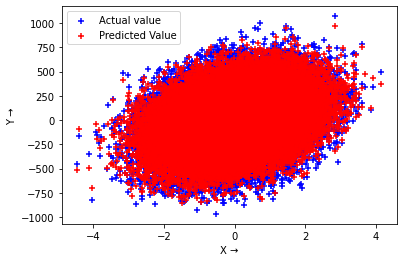

After 8901 iteration Loss: 4769.769152654015


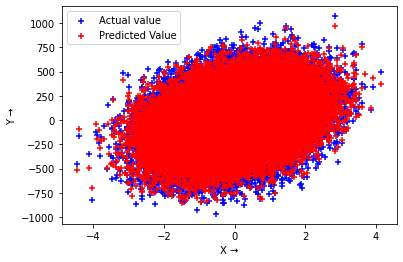

After 9001 iteration Loss: 4769.769071642754


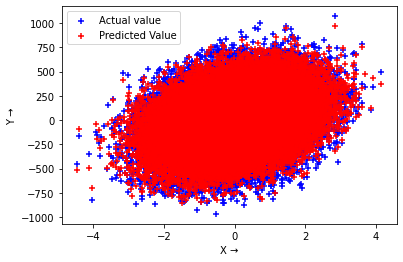

After 9101 iteration Loss: 4769.769005222856


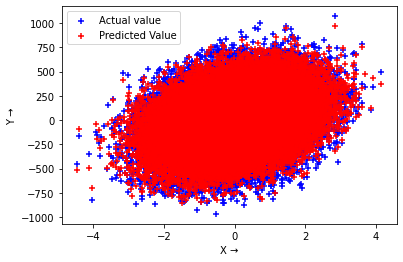

After 9201 iteration Loss: 4769.768950765521


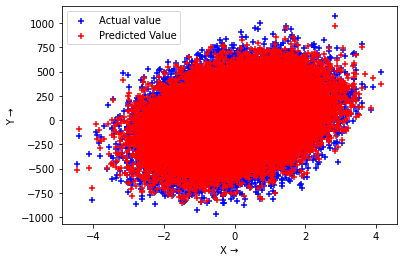

After 9301 iteration Loss: 4769.768906115672


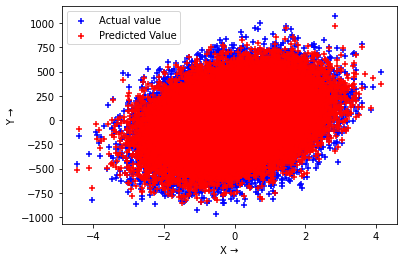

After 9401 iteration Loss: 4769.768869506577


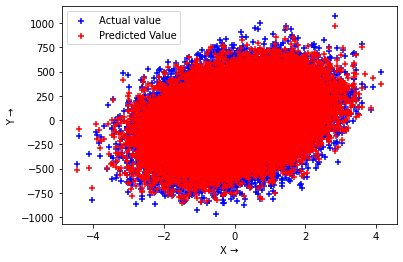

After 9501 iteration Loss: 4769.76883948985


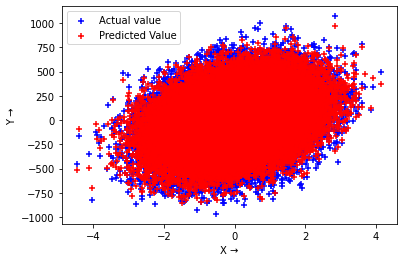

After 9601 iteration Loss: 4769.768814878066


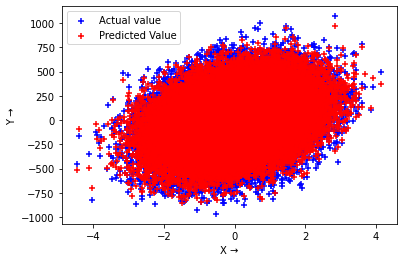

After 9701 iteration Loss: 4769.76879469774


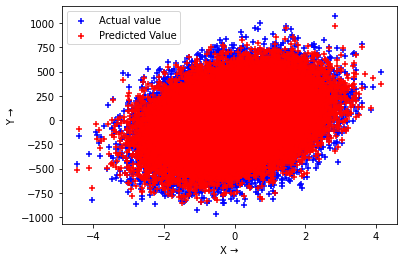

After 9801 iteration Loss: 4769.768778150767


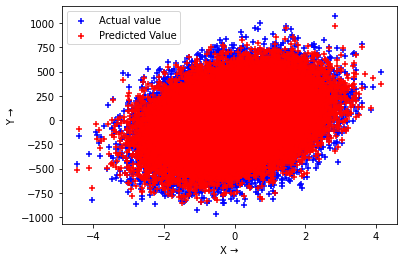

After 9901 iteration Loss: 4769.768764582809


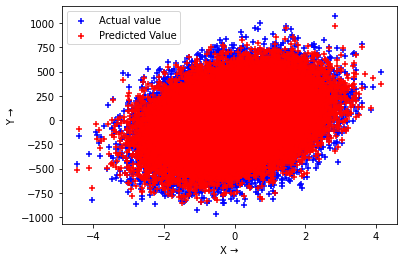

After 10001 iteration Loss: 4769.768753457412


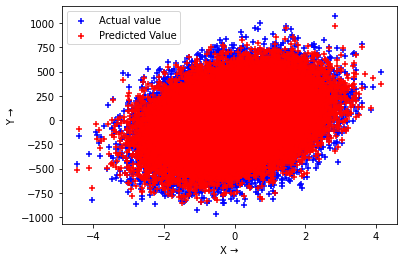

After 10101 iteration Loss: 4769.76874433474


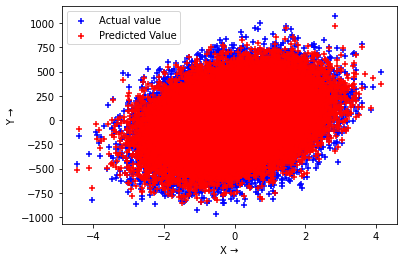

After 10201 iteration Loss: 4769.768736854186


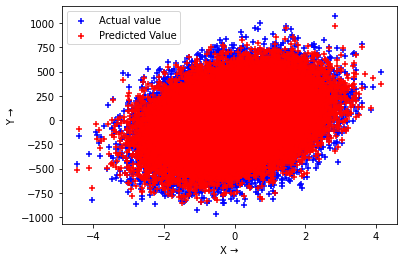

After 10301 iteration Loss: 4769.768730720084


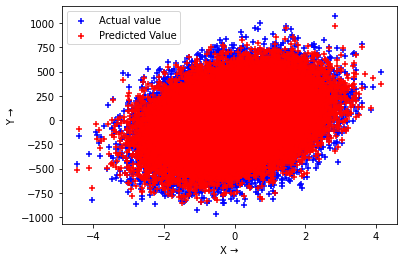

After 10401 iteration Loss: 4769.7687256900235


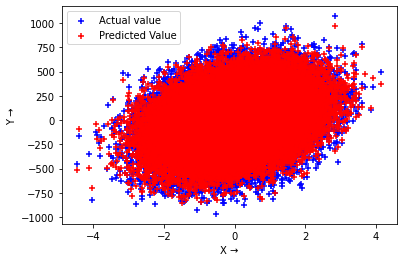

After 10501 iteration Loss: 4769.76872156524


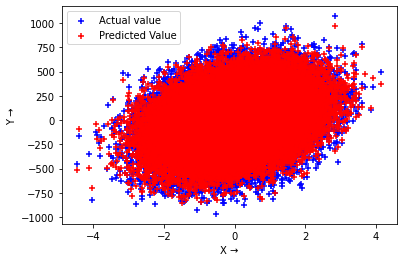

After 10601 iteration Loss: 4769.76871818277


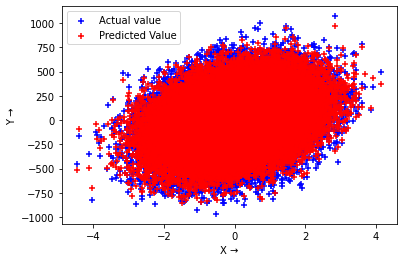

After 10701 iteration Loss: 4769.768715408988


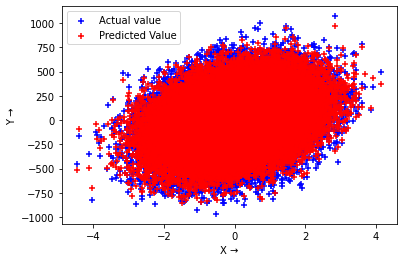

After 10801 iteration Loss: 4769.768713134332


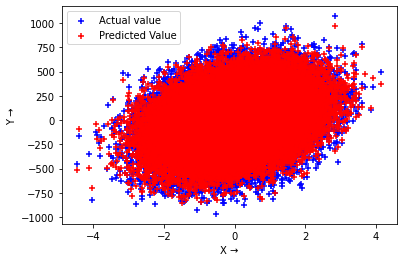

After 10901 iteration Loss: 4769.768711268964


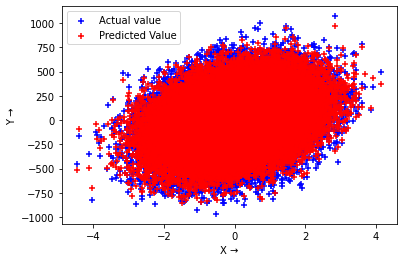

After 11001 iteration Loss: 4769.768709739219


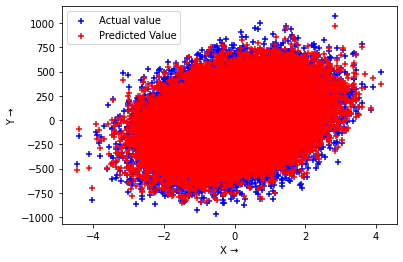

After 11101 iteration Loss: 4769.768708484698


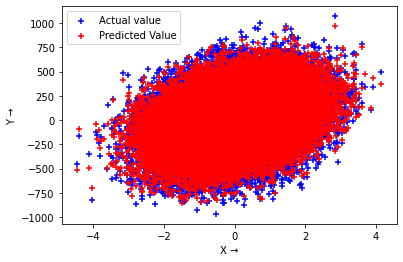

After 11201 iteration Loss: 4769.768707455871


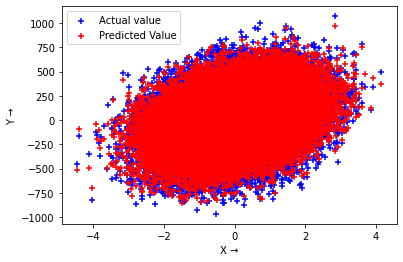

After 11301 iteration Loss: 4769.768706612124


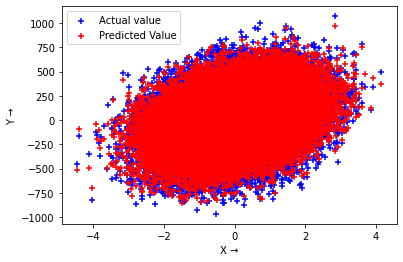

After 11401 iteration Loss: 4769.7687059201535


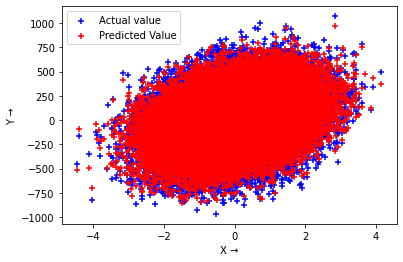

After 11501 iteration Loss: 4769.7687053526515


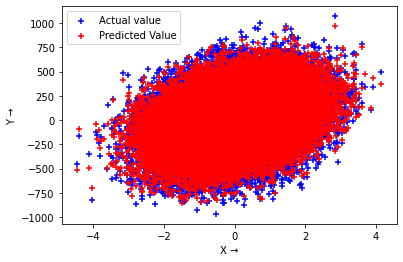

After 11601 iteration Loss: 4769.768704887223


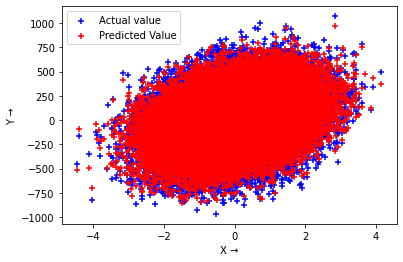

After 11701 iteration Loss: 4769.7687045055045


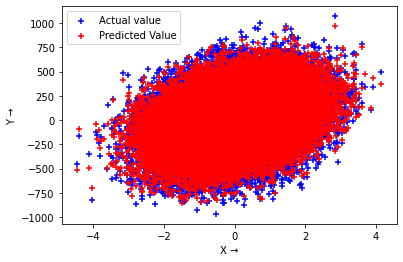

After 11801 iteration Loss: 4769.768704192436


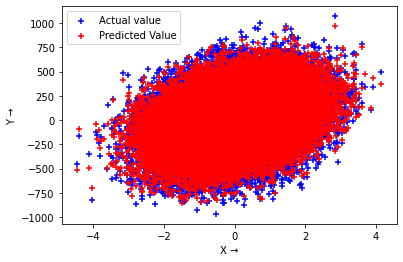

After 11901 iteration Loss: 4769.768703935669


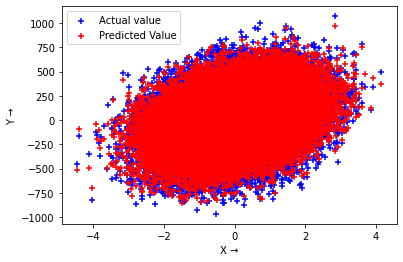

After 12001 iteration Loss: 4769.768703725074


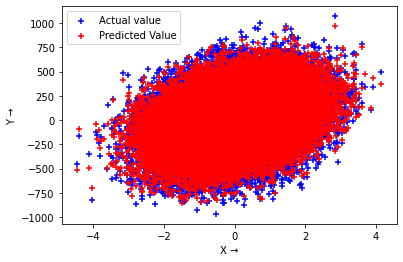

After 12101 iteration Loss: 4769.768703552348


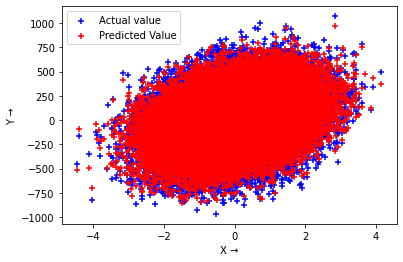

After 12201 iteration Loss: 4769.76870341068


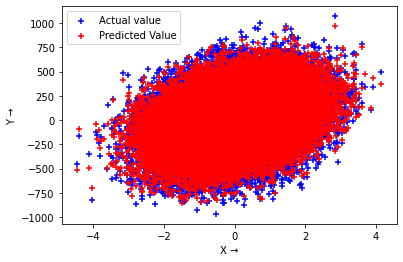

After 12301 iteration Loss: 4769.768703294482


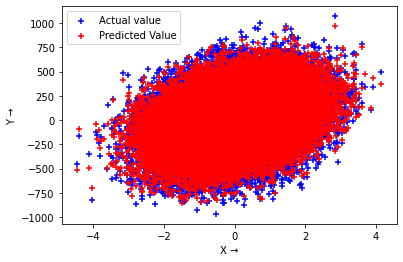

After 12401 iteration Loss: 4769.768703199176


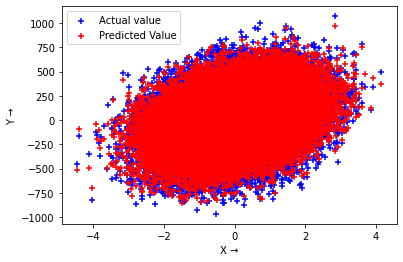

After 12501 iteration Loss: 4769.768703121004


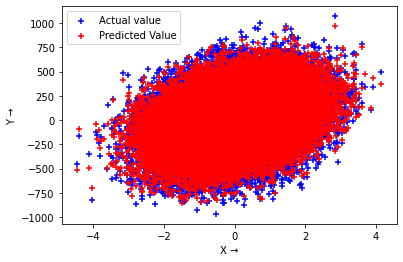

After 12601 iteration Loss: 4769.768703056885


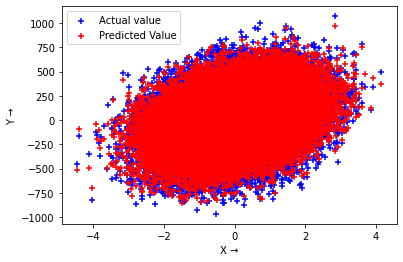

After 12701 iteration Loss: 4769.768703004291


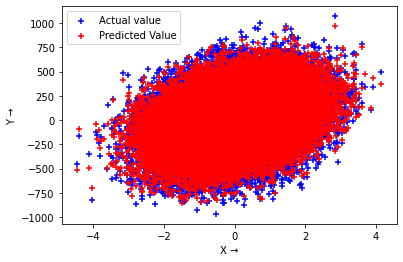

After 12801 iteration Loss: 4769.768702961152


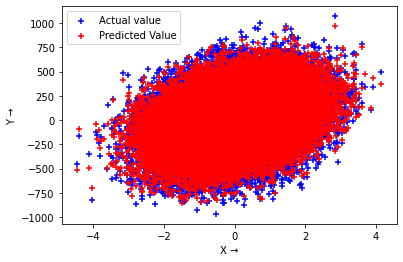

After 12901 iteration Loss: 4769.768702925766


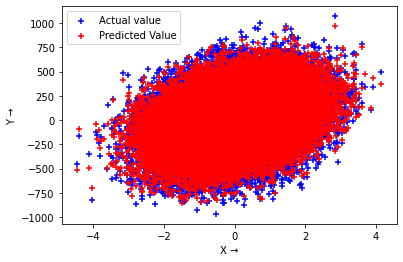

After 13001 iteration Loss: 4769.768702896738


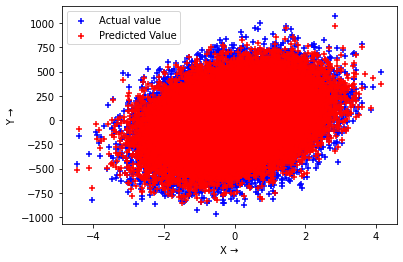

After 13101 iteration Loss: 4769.768702872929


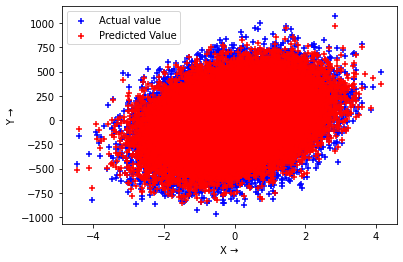

After 13201 iteration Loss: 4769.768702853399


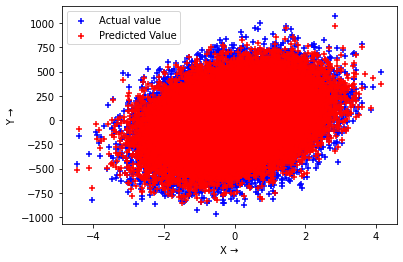

After 13301 iteration Loss: 4769.7687028373775


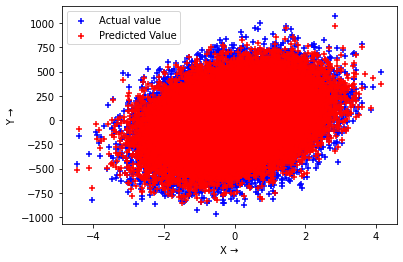

After 13401 iteration Loss: 4769.768702824235


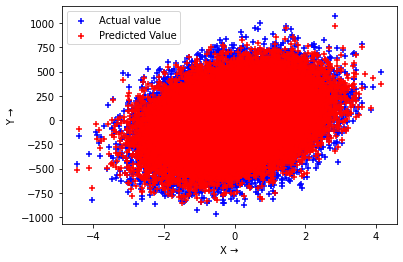

After 13501 iteration Loss: 4769.768702813454


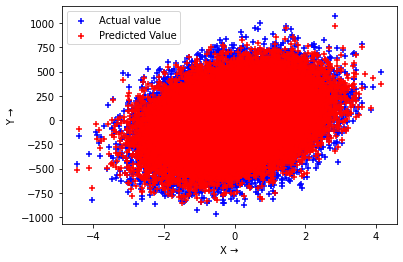

After 13601 iteration Loss: 4769.76870280461


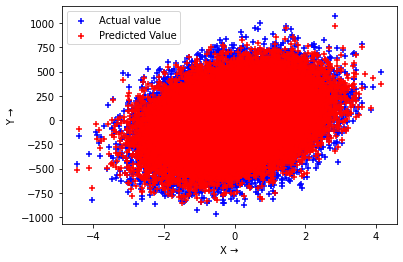

After 13701 iteration Loss: 4769.768702797356


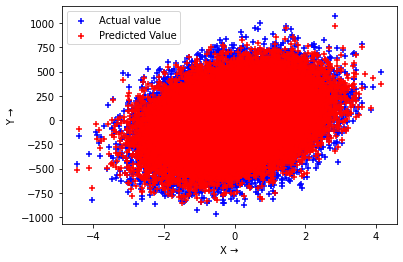

After 13801 iteration Loss: 4769.768702791404


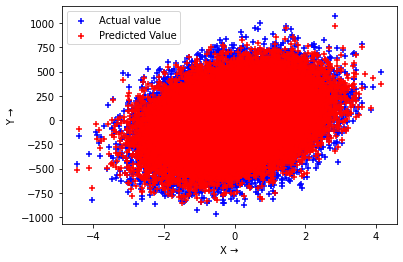

After 13901 iteration Loss: 4769.768702786522


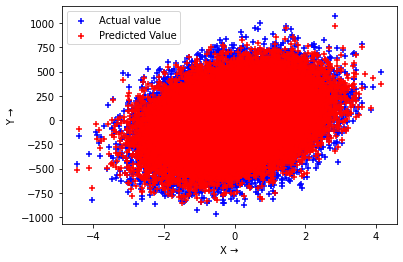

After 14001 iteration Loss: 4769.768702782517


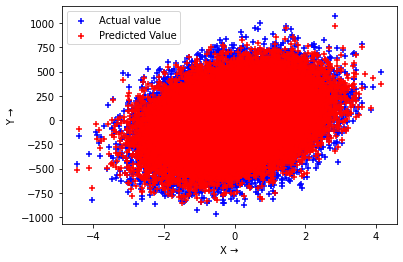

After 14101 iteration Loss: 4769.76870277923


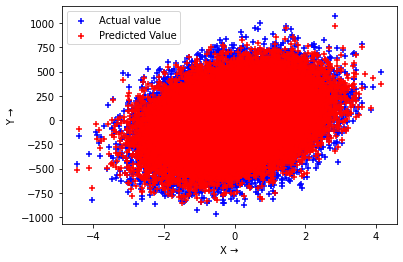

After 14201 iteration Loss: 4769.768702776535


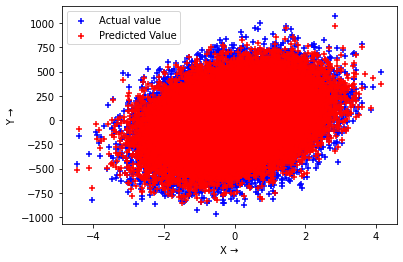

After 14301 iteration Loss: 4769.768702774324


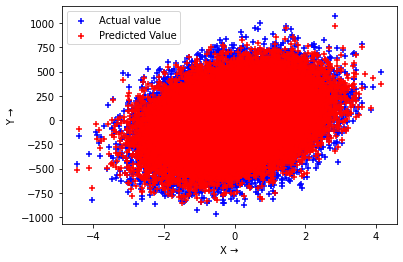

After 14401 iteration Loss: 4769.768702772509


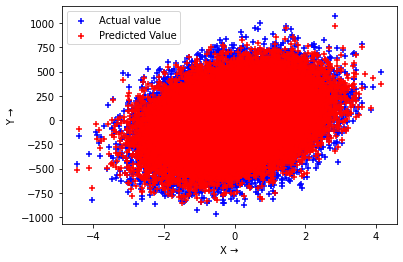

After 14501 iteration Loss: 4769.768702771021


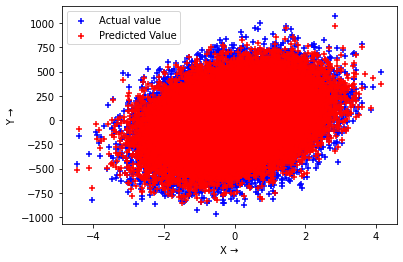

After 14601 iteration Loss: 4769.768702769799


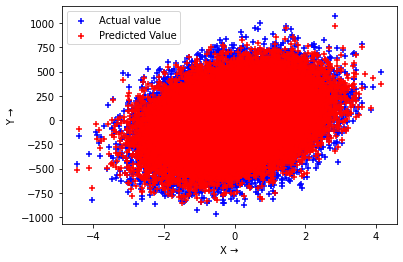

After 14701 iteration Loss: 4769.768702768797


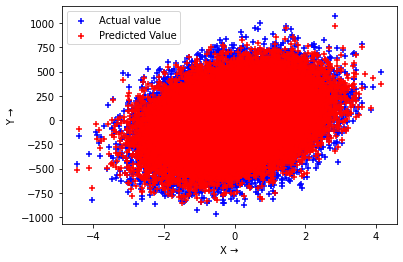

After 14801 iteration Loss: 4769.768702767977


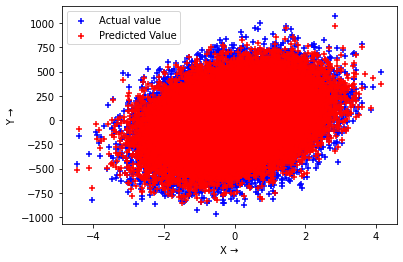

After 14901 iteration Loss: 4769.768702767301


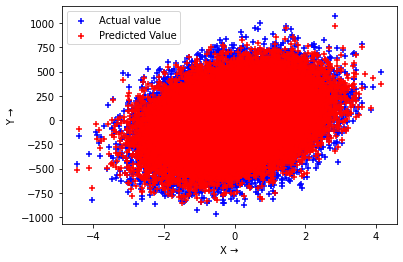

[72.99696418 66.24903393 97.4424835   1.71779035 17.36334422 24.81612464
 71.2332949  30.9955764  20.35045818 93.74919176 39.3688636  37.25518816
  2.82784136 40.70115157 40.70115157 46.08721713 21.51569132 33.84606959
 33.68444314 39.24757319] -0.36565062391342007


<Figure size 432x288 with 0 Axes>

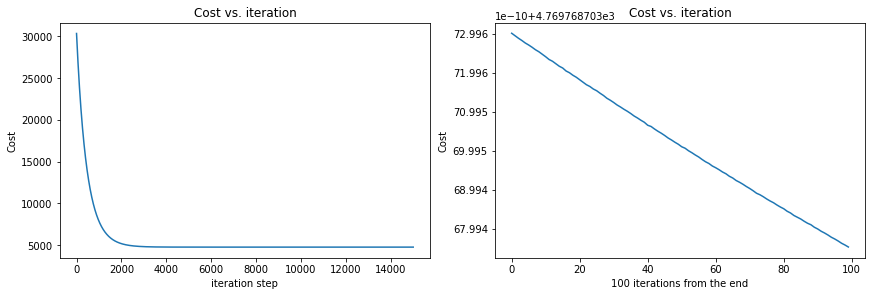

In [8]:

x_norm, mu, sigma= zscore_normalize_features(x_train)


x_train= x_norm

#print(x_train)


W, b, cost_history = train_lr(no_of_iterations=15000, learning_rate=1e-3, X=x_train, Y=y_train)


print(W,b)



fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_history)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')           
ax1.set_xlabel('iteration step')  

ax2.plot(cost_history[-100:])
ax2.set_title("Cost vs. iteration")
ax2.set_ylabel('Cost')           
ax2.set_xlabel('100 iterations from the end')  


plt.show()

'''
final output is [72.99696418 66.24903393 97.4424835   1.71779035 17.36334422 24.81612464
 71.2332949  30.9955764  20.35045818 93.74919176 39.3688636  37.25518816
  2.82784136 40.70115157 40.70115157 46.08721713 21.51569132 33.84606959
 33.68444314 39.24757319] -0.36565062391342007
'''